<a href="https://colab.research.google.com/github/alibelhrak/NLP_Project-2024_US_Election_Sentiment_on_X/blob/main/2024_US_Election_Sentiment_on_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
pip install opendatasets

In [57]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/emirhanai/2024-u-s-election-sentiment-on-x')

Skipping, found downloaded files in "./2024-u-s-election-sentiment-on-x" (use force=True to force download)


# Importing Libraries

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# Loading Dataset

In [59]:
df_train = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/train.csv')
df_val = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/val.csv')
df_test = pd.read_csv('/content/2024-u-s-election-sentiment-on-x/test.csv')

In [60]:
df_train


,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive
...,...,...,...,...,...,...,...,...,...
495,496,@user1067,2024-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,95,360,positive
496,497,@econTalk7,2024-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,100,440,neutral
497,498,@greenFutureNow7,2024-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,75,240,positive
498,499,@indiePerspective7,2024-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,18,85,neutral


In [61]:
df_train['candidate'].value_counts()

,count
candidate,
Kamala Harris,100
Donald Trump,100
Jill Stein,100
Robert Kennedy,100
Chase Oliver,100


In [79]:
df_train['sentiment'] = df_train['sentiment'].str.strip().str.lower()
df_val['sentiment'] = df_val['sentiment'].str.strip().str.lower()
df_test['sentiment'] = df_test['sentiment'].str.strip().str.lower()
df_train['sentiment'].value_counts()


,count
sentiment,
positive,329
neutral,126
negative,45


# Cleaning Data

In [152]:
print('Train Dataset Info:')
df_train.info()

print('\nTest Dataset Info:')
df_test.info()

print('\nValidation Dataset Info:')
df_val.info()

print('\nDuplicate entries in Train:', df_train.duplicated().sum())
print('Duplicate entries in Test:', df_test.duplicated().sum())
print('Duplicate entries in Validation:', df_val.duplicated().sum())

print('\nNumerical Features Summary:')
print(df_train.describe())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     500 non-null    int64 
 1   user_handle  500 non-null    object
 2   timestamp    500 non-null    object
 3   tweet_text   500 non-null    object
 4   candidate    500 non-null    object
 5   party        500 non-null    object
 6   retweets     500 non-null    int64 
 7   likes        500 non-null    int64 
 8   sentiment    500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     50 non-null     int64 
 1   user_handle  50 non-null     object
 2   timestamp    50 non-null     object
 3   tweet_text   50 non-null     object
 4   c

# Data Preparation

In [80]:
df_train_text = df_train['tweet_text']
df_valid_text = df_val['tweet_text']
df_test_text = df_test['tweet_text']

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train_text)

train_sequences = tokenizer.texts_to_sequences(df_train_text)
valid_sequences = tokenizer.texts_to_sequences(df_valid_text)
test_sequences = tokenizer.texts_to_sequences(df_test_text)

train_padded = pad_sequences(train_sequences, maxlen=50, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=50, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post')


all_labels = list(df_train['sentiment']) + list(df_val['sentiment']) + list(df_test['sentiment'])

label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

train_labels = label_encoder.transform(df_train['sentiment'])
valid_labels = label_encoder.transform(df_val['sentiment'])
test_labels = label_encoder.transform(df_test['sentiment'])

onehot_encoder = OneHotEncoder(sparse_output=False)

train_labels = np.array(train_labels).reshape(-1, 1)
valid_labels = np.array(valid_labels).reshape(-1, 1)
test_labels = np.array(test_labels).reshape(-1, 1)

train_onehot_labels = onehot_encoder.fit_transform(train_labels)
valid_onehot_labels = onehot_encoder.transform(valid_labels)
test_onehot_labels = onehot_encoder.transform(test_labels)

print("Train input shape:", train_padded.shape)
print("Train label shape:", train_onehot_labels.shape)
print("Validation input shape:", valid_padded.shape)
print("Validation label shape:", valid_onehot_labels.shape)
print("Test input shape:", test_padded.shape)
print("Test label shape:", test_onehot_labels.shape)


Train input shape: (500, 50)
Train label shape: (500, 3)
Validation input shape: (50, 50)
Validation label shape: (50, 3)
Test input shape: (50, 50)
Test label shape: (50, 3)


In [84]:
train_input = np.array(train_padded)
val_input = np.array(valid_padded)
test_input = np.array(test_padded)

# ✅ Use the correct label variables
train_label = np.array(train_onehot_labels)
val_label = np.array(valid_onehot_labels)
test_label = np.array(test_onehot_labels)

# Check shapes
print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)
print("Test input shape:", test_input.shape)
print("Test label shape:", test_label.shape)


Train input shape: (500, 50)
Train label shape: (500, 3)
Validation input shape: (50, 50)
Validation label shape: (50, 3)
Test input shape: (50, 50)
Test label shape: (50, 3)


# Creating The Model

In [106]:
word_index = tokenizer.word_index
vocab_size = len(word_index)+1
embedding_dim = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [107]:
print(type(train_input), train_input.shape)
print(type(train_label), train_label.shape)


<class 'numpy.ndarray'> (500, 50)
<class 'numpy.ndarray'> (500, 3)


In [108]:
train_input = np.array(train_input, dtype=np.float32)
train_label = np.array(train_label, dtype=np.float32)


In [109]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [110]:
print("Train label shape:", train_label.shape)
print("Validation label shape:", val_label.shape)


Train label shape: (500, 3)
Validation label shape: (50, 3)


In [111]:
print("Train input shape:", train_input.shape)
print("Train label shape:", train_label.shape)
print("Validation input shape:", val_input.shape)
print("Validation label shape:", val_label.shape)


Train input shape: (500, 50)
Train label shape: (500, 3)
Validation input shape: (50, 50)
Validation label shape: (50, 3)


In [112]:
history = model.fit(train_input, train_label, epochs=64, batch_size=32, validation_data=(val_input, val_label))


Epoch 1/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.6030 - loss: 0.9821 - val_accuracy: 0.6800 - val_loss: 0.7926
Epoch 2/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.6577 - loss: 0.8541 - val_accuracy: 0.6800 - val_loss: 0.8494
Epoch 3/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6696 - loss: 0.8613 - val_accuracy: 0.6800 - val_loss: 0.7880
Epoch 4/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.6693 - loss: 0.8381 - val_accuracy: 0.6800 - val_loss: 0.7874
Epoch 5/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6253 - loss: 0.8883 - val_accuracy: 0.6800 - val_loss: 0.7879
Epoch 6/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.6587 - loss: 0.8713 - val_accuracy: 0.6800 - val_loss: 0.8084
Epoch 7/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.6625 - loss: 0.8560 - val_accuracy: 0.6800 - val_loss: 0.7909
Epoch 8/64
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6826 - loss: 0.8135 - val_accuracy: 0.6800 -

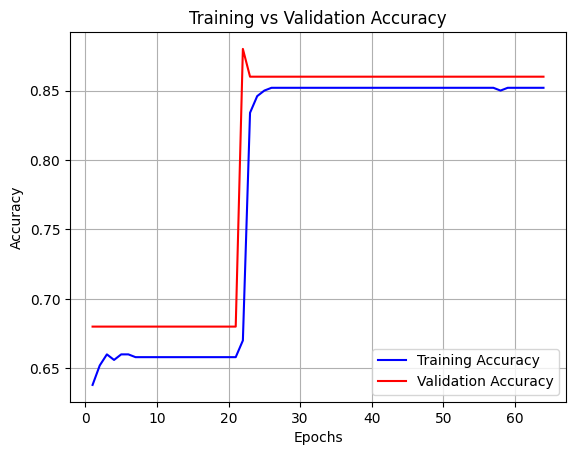

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1 , len(acc) +1)
plt.plot(epochs, acc , color = 'b', label='Training Accuracy')
plt.plot(epochs, val_acc , color = 'r', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

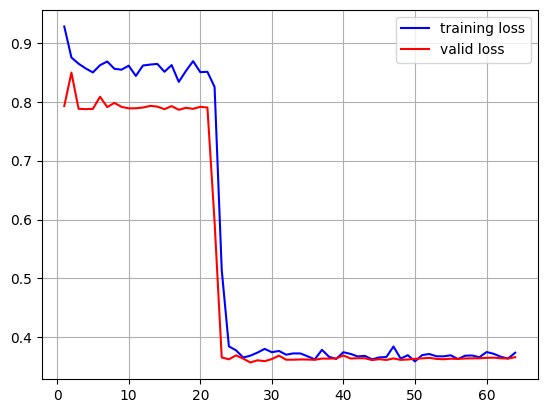

In [114]:
acc = history.history['loss']
val_acc = history.history['val_loss']
epochs = range(1 , len(acc) +1)
plt.plot(epochs, acc , color = 'b' , label = "training loss" )
plt.plot(epochs, val_acc , color = 'r'  , label= "valid loss")
plt.legend()
plt.grid(True)
plt.show()

# Saving Model

In [100]:
saved_model =model.save('my_model.h5')
saved_model

# Saving History

In [101]:
import json
with open('training_history.json' ,'w') as f:
  json.dump(history.history , f)

# Showing Confusion Matrix And Classification Reaport

In [133]:
labels = ["Donald Trump", " Jill Stein", "Chase Olive", "Robert Kennedy" , "Kamala Harris"]
la.fit(labels)


LabelEncoder()

In [134]:
prediction = model.predict(test_input)
predicted_classes = np.argmax(prediction, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 


In [135]:
y_true =test_onehot_labels
y_true_classes = np.argmax(y_true, axis=1)


In [136]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

cm = confusion_matrix(predicted_classes , y_true_classes)
cm

array([[ 0,  0,  0],
       [ 3, 13,  4],
       [ 0,  0, 30]])

In [137]:
AS = accuracy_score(predicted_classes , y_true_classes)
AS

0.86

In [138]:
CR = classification_report(y_true_classes, predicted_classes)
print(CR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.65      1.00      0.79        13
           2       1.00      0.88      0.94        34

    accuracy                           0.86        50
   macro avg       0.55      0.63      0.58        50
weighted avg       0.85      0.86      0.84        50



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


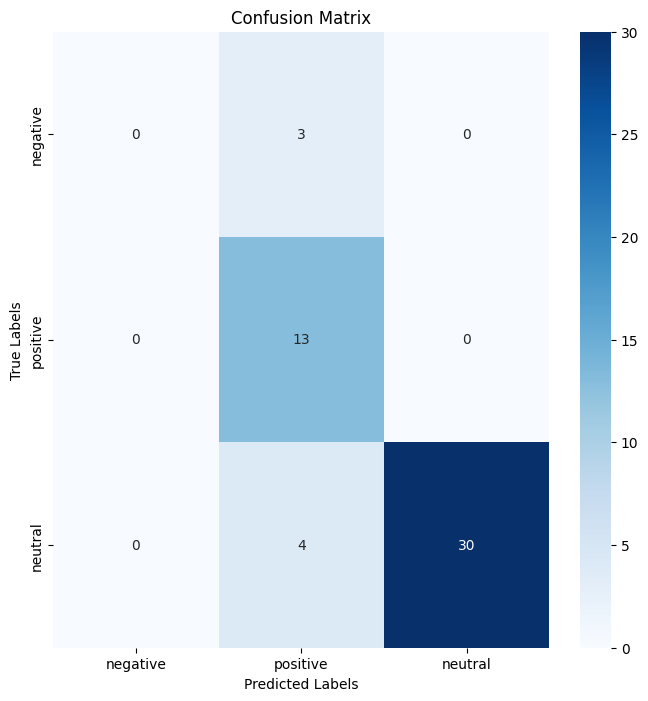

In [139]:
cm = confusion_matrix(y_true_classes, predicted_classes)

labels = ["negative", "positive", "neutral"]

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Making Prediction

In [149]:
text = "I support this candidate harris of their healthcare policies."
sequence = tokenizer.texts_to_sequences([text])
padded = pad_sequences(sequence, maxlen=50)
prediction = model.predict(padded)
predicted_class = np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [150]:
label = la.inverse_transform([predicted_class])[0]
print("Prediction Probabilities:", prediction[0])


Prediction Probabilities: [2.4652454e-07 2.9089617e-06 9.9999690e-01]


In [148]:
print("Classes in LabelEncoder:", la.classes_)


Classes in LabelEncoder: [' Jill Stein' 'Chase Olive' 'Donald Trump' 'Kamala Harris'
 'Robert Kennedy']
